In [1]:
import pandas as pd
import numpy as np
import csv
import requests
import urllib.request, json 
from pprint import pprint
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import itertools
from sklearn.naive_bayes import BernoulliNB, GaussianNB
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn import datasets
from sklearn.metrics import confusion_matrix

c:\users\v-ozgenc\appdata\local\amlworkbench\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('C:/Users/v-ozgenc/Desktop/Out1.csv', index_col = 'Unnamed: 0')
df = df.drop('Difference', 1)
df = df.drop('score', 1)
df = df.dropna()
df = df.drop('week', 1)

In [3]:
norm = Normalizer()
df[['homeworth', 'awayworth']] = norm.fit_transform(df[['homeworth', 'awayworth']])
(df[df.winner != 'Draw'])['winner'] = 'No'
df.ix[df.winner != 'Draw', 'winner'] = 'No'
df

c:\users\v-ozgenc\appdata\local\amlworkbench\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\v-ozgenc\appdata\local\amlworkbench\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Season,away,home,winner,homeATT,homeMID,homeDEF,homeOVR,awayATT,awayMID,awayDEF,awayOVR,homeworth,homeage,awayworth,awayage,homesupport,awaysupport
0,2016.0,BURSASPOR,ADANASPOR A.Ş.,No,71.0,67.0,69.0,69.0,70.0,72.0,71.0,72.0,0.377705,23.7,0.925926,24.4,4594.0,16106.0
1,2016.0,ATIKER KONYASPOR,ÇAYKUR RIZESPOR A.Ş.,Draw,76.0,68.0,68.0,69.0,72.0,70.0,71.0,71.0,0.769856,22.6,0.638217,25.3,3369.0,15723.0
2,2016.0,KASIMPAŞA A.Ş.,TRABZONSPOR A.Ş.,No,73.0,74.0,76.0,74.0,69.0,71.0,71.0,70.0,0.924708,23.8,0.380677,23.4,17252.0,1416.0
4,2016.0,AKHISAR BELEDIYE GENÇLIK VE SPOR,KAYSERISPOR,No,73.0,72.0,70.0,71.0,70.0,71.0,71.0,70.0,0.674391,25.0,0.738374,26.7,5524.0,2501.0
5,2016.0,GAZIANTEPSPOR,GENÇLERBIRLIĞI,No,69.0,70.0,70.0,70.0,71.0,69.0,68.0,70.0,0.671836,24.1,0.740700,24.6,2625.0,4236.0
6,2016.0,FENERBAHÇE A.Ş.,MEDIPOL BAŞAKŞEHIR FK,No,78.0,75.0,73.0,75.0,80.0,77.0,78.0,77.0,0.396945,26.4,0.917843,24.8,3208.0,16485.0
7,2016.0,OSMANLISPOR FUTBOL KULÜBÜ,ANTALYASPOR A.Ş.,Draw,81.0,71.0,72.0,71.0,74.0,74.0,72.0,73.0,0.593393,25.4,0.804913,25.1,12645.0,3792.0
8,2016.0,KARDEMIR KARABÜKSPOR,GALATASARAY A.Ş.,No,76.0,77.0,74.0,76.0,71.0,70.0,70.0,70.0,0.963230,25.1,0.268677,25.8,21351.0,4422.0
9,2016.0,ANTALYASPOR A.Ş.,AYTEMIZ ALANYASPOR,No,73.0,70.0,71.0,70.0,81.0,71.0,72.0,71.0,0.679184,25.5,0.733968,25.4,4541.0,12645.0
10,2016.0,BEŞIKTAŞ A.Ş.,ATIKER KONYASPOR,Draw,72.0,70.0,71.0,71.0,78.0,78.0,76.0,78.0,0.159976,25.3,0.987121,25.3,15723.0,30448.0


In [4]:
winner = df['winner']
df = df.drop('winner', 1)
columns_to_encode = list(df.select_dtypes(include=['category','object']))
for column_to_encode in columns_to_encode:
    dummies = pd.get_dummies(df[column_to_encode])
    one_hot_col_names = []
    for col_name in list(dummies.columns):
        one_hot_col_names.append(column_to_encode + '_' + col_name)
    dummies.columns = one_hot_col_names
    df = df.drop(column_to_encode, axis=1)
    df = df.join(dummies)
df['winner'] = winner
df

,Season,homeATT,homeMID,homeDEF,homeOVR,awayATT,awayMID,awayDEF,awayOVR,homeworth,...,home_KASIMPAŞA A.Ş.,home_KAYSERISPOR,home_MEDICANA SIVASSPOR,home_MEDIPOL BAŞAKŞEHIR FK,home_MERSIN IDMANYURDU,home_OSMANLISPOR FUTBOL KULÜBÜ,home_TORKU KONYASPOR,home_TRABZONSPOR A.Ş.,home_ÇAYKUR RIZESPOR A.Ş.,winner
0,2016.0,71.0,67.0,69.0,69.0,70.0,72.0,71.0,72.0,0.377705,...,0,0,0,0,0,0,0,0,0,No
1,2016.0,76.0,68.0,68.0,69.0,72.0,70.0,71.0,71.0,0.769856,...,0,0,0,0,0,0,0,0,1,Draw
2,2016.0,73.0,74.0,76.0,74.0,69.0,71.0,71.0,70.0,0.924708,...,0,0,0,0,0,0,0,1,0,No
4,2016.0,73.0,72.0,70.0,71.0,70.0,71.0,71.0,70.0,0.674391,...,0,1,0,0,0,0,0,0,0,No
5,2016.0,69.0,70.0,70.0,70.0,71.0,69.0,68.0,70.0,0.671836,...,0,0,0,0,0,0,0,0,0,No
6,2016.0,78.0,75.0,73.0,75.0,80.0,77.0,78.0,77.0,0.396945,...,0,0,0,1,0,0,0,0,0,No
7,2016.0,81.0,71.0,72.0,71.0,74.0,74.0,72.0,73.0,0.593393,...,0,0,0,0,0,0,0,0,0,Draw
8,2016.0,76.0,77.0,74.0,76.0,71.0,70.0,70.0,70.0,0.963230,...,0,0,0,0,0,0,0,0,0,No
9,2016.0,73.0,70.0,71.0,70.0,81.0,71.0,72.0,71.0,0.679184,...,0,0,0,0,0,0,0,0,0,No
10,2016.0,72.0,70.0,71.0,71.0,78.0,78.0,76.0,78.0,0.159976,...,0,0,0,0,0,0,0,0,0,Draw


In [32]:
model = BernoulliNB()
train, test = train_test_split(df,random_state = 17, test_size = 0.3)
target = train['winner'].values
train = train.drop('winner', 1)
train = train.values
expected = test['winner'].values
test = test.drop('winner', 1)
model.fit(train, target)
predicted = model.predict(test)
probab = model.predict_proba(test)
print("Accuracy of BernoulliNB", accuracy_score(expected, predicted))

Accuracy of BernoulliNB 0.809782608696


In [17]:
model = SGDClassifier(loss="hinge", penalty="elasticnet")
train, test = train_test_split(df,random_state = 16, test_size = 0.3)
    
target = train['winner'].values
train = train.drop('winner', 1)
train = train.values
expected = test['winner'].values
test = test.drop('winner', 1)
model.fit(train, target)
predicted = model.predict(test)
print("Accuracy of SGDClassifier", accuracy_score(expected, predicted))

Accuracy of SGDClassifier 0.722826086957


c:\users\v-ozgenc\appdata\local\amlworkbench\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [30]:
model = OneVsRestClassifier(LinearSVC(random_state=19))
train, test = train_test_split(df,random_state = 17, test_size = 0.3)
    
target = train['winner'].values
train = train.drop('winner', 1)
train = train.values
expected = test['winner'].values
test = test.drop('winner', 1)
model.fit(train, target)
predicted = model.predict(test)
print("Accuracy of OneVsRestClassifier", accuracy_score(expected, predicted))

Accuracy of OneVsRestClassifier 0.79347826087


In [121]:
model = KNeighborsClassifier(n_neighbors=15)
train, test = train_test_split(df, test_size = 0.3)
    
target = train['winner'].values
train = train.drop('winner', 1)
train = train.values
expected = test['winner'].values
test = test.drop('winner', 1)
model.fit(train, target)
predicted = model.predict(test)
print("Accuracy of KNeighborsClassifier", accuracy_score(expected, predicted))

Accuracy of KNeighborsClassifier 0.798913043478


In [126]:
model = GaussianNB()
train, test = train_test_split(df, test_size = 0.3)
    
target = train['winner'].values
train = train.drop('winner', 1)
train = train.values
expected = test['winner'].values
test = test.drop('winner', 1)
model.fit(train, target)
predicted = model.predict(test)
print("Accuracy of GaussianNB", accuracy_score(expected, predicted))

Accuracy of GaussianNB 0.554347826087


In [128]:
model = DecisionTreeClassifier(random_state=0)
train, test = train_test_split(df, test_size = 0.3)
    
target = train['winner'].values
train = train.drop('winner', 1)
train = train.values
expected = test['winner'].values
test = test.drop('winner', 1)
model.fit(train, target)
predicted = model.predict(test)
print("Accuracy of DecisionTreeClassifier", accuracy_score(expected, predicted))

Accuracy of DecisionTreeClassifier 0.614130434783


Confusion matrix, without normalization
[[  3  35]
 [  0 146]]
Normalized confusion matrix
[[ 0.08  0.92]
 [ 0.    1.  ]]


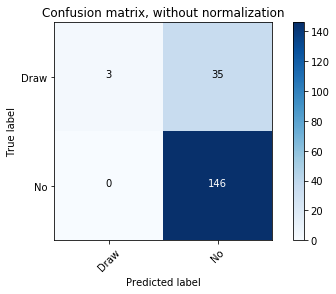

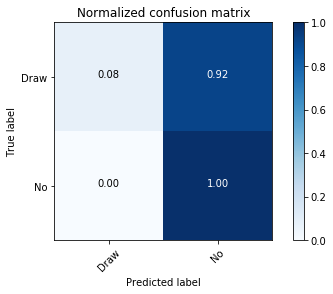

In [33]:
import itertools
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import confusion_matrix

class_names = ['Draw', 'No']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train, target, test, expected 

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
y_pred = predicted


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()